# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [21]:
# Create a Beautiful Soup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [23]:
# Extract all rows of data
mars_table = soup.find_all('table')
mars_df = pd.read_html(str(mars_table))[0]
mars_df

C:\Users\ferou\AppData\Local\Temp\ipykernel_25944\613149519.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mars_df = pd.read_html(str(mars_table))[0]


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
table = soup.find('table')
# Initialize an empty list to store the data
mars_weather = []

# Get the table headers
headers = [header.text for header in table.find_all('th')]
mars_weather.append(headers)

# Loop through the table rows and get the data
for row in table.find_all('tr')[1:]:  # Skipping the header row
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    mars_weather.append(row_data)

# Create the DataFrame
df = pd.DataFrame(mars_weather[1:], columns=mars_weather[0])

# Display the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(columns=mars_weather)
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(mars_weather_df)
        mars_weather_df.loc[lenghth]=row_data

In [15]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
,2,2012-08-16,10,155,6,-75.0,739.0
,13,2012-08-17,11,156,6,-76.0,740.0
,24,2012-08-18,12,156,6,-76.0,741.0
,35,2012-08-19,13,157,6,-74.0,732.0
,46,2012-08-20,14,157,6,-74.0,740.0
,57,2012-08-21,15,158,6,-78.0,740.0
,68,2012-08-22,16,158,6,-77.0,740.0
,79,2012-08-23,17,159,6,-76.0,742.0
,112,2012-08-27,21,161,6,-74.0,741.0
,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [26]:
# Change data types for data analysis

# change the data type of columns 'A' and 'B'
mars_df[['terrestrial_date']] = mars_df[['terrestrial_date']].astype('datetime64[ns]')
mars_df[['sol', 'ls', 'month']] = mars_df[['sol', 'ls', 'month']].astype('int64')
mars_df[['min_temp', 'pressure']] = mars_df[['min_temp','pressure']].astype('float64')

# print the data types of each column
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [27]:
# Confirm type changes wereprint(mars_df.dtypes)
print(mars_df.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
group_by_month = mars_df.groupby('month')
group_by_date = mars_df.groupby('terrestrial_date')
group_by_pressure = mars_df.groupby('pressure')
group_by_month['month'].count()/3

month
1     58.000000
2     59.333333
3     64.000000
4     64.666667
5     49.666667
6     49.000000
7     47.333333
8     47.000000
9     44.666667
10    37.333333
11    46.000000
12    55.333333
Name: month, dtype: float64

In [29]:
# 2. How many Martian days' worth of data are there?
group_by_date['terrestrial_date'].count()

terrestrial_date
2012-08-16    1
2012-08-17    1
2012-08-18    1
2012-08-19    1
2012-08-20    1
             ..
2018-02-23    1
2018-02-24    1
2018-02-25    1
2018-02-26    1
2018-02-27    1
Name: terrestrial_date, Length: 1867, dtype: int64

In [30]:
# 3. What is the average low temperature by month?
avg_min_temp = group_by_month['min_temp'].mean()

print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0, 0.5, 'Average Minimum Temperature (°C)')

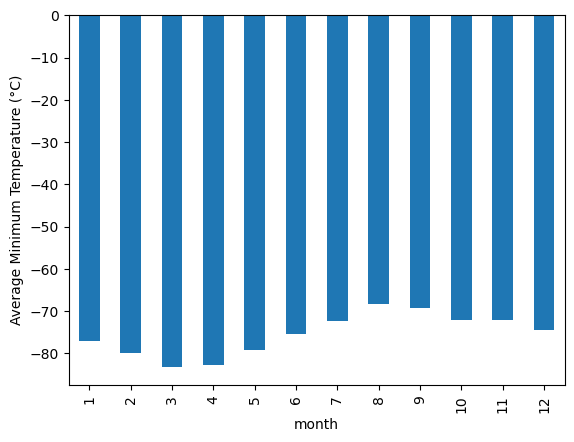

In [31]:
# Plot the average temperature by month
avg_min_temp_chart = avg_min_temp.plot.bar()

# Label the y-axis 
avg_min_temp_chart.set_ylabel('Average Minimum Temperature (°C)')

Text(0, 0.5, 'Average Minimum Temperature (°C)')

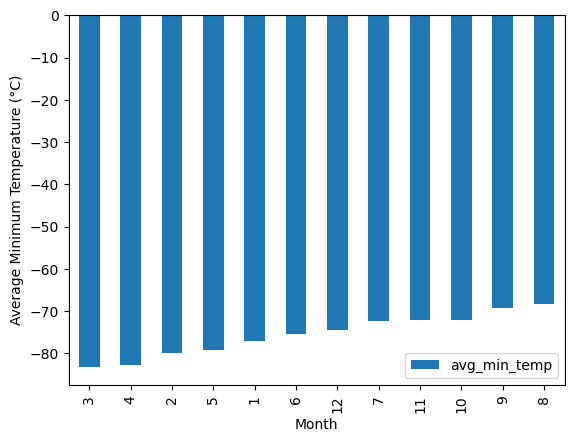

In [32]:
# Identify the coldest and hottest months in Curiosity's location
# Reset the index to create columns and give the second one avg_min_temp name 
avg_min_temp_renamed = avg_min_temp.reset_index().rename(columns={'min_temp': 'avg_min_temp'})

# Set the index to month column 
avg_min_temp_renamed = avg_min_temp_renamed.set_index('month')

# Sort the avg min temp values in descending order 
avg_min_temp_sorted = avg_min_temp_renamed.sort_values(by='avg_min_temp')

# Plot the results as a bar chart 
avg_min_temp_sorted_chart = avg_min_temp_sorted.plot.bar()

# Label the axes 
avg_min_temp_sorted_chart.set_xlabel('Month')
avg_min_temp_sorted_chart.set_ylabel('Average Minimum Temperature (°C)')

## Month 3 was the coldest month, and month 8 was the warmest month on mars

In [33]:
# 4. Average pressure by Martian month
avg_pressure = group_by_month['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0, 0.5, 'Atmospheric Pressure')

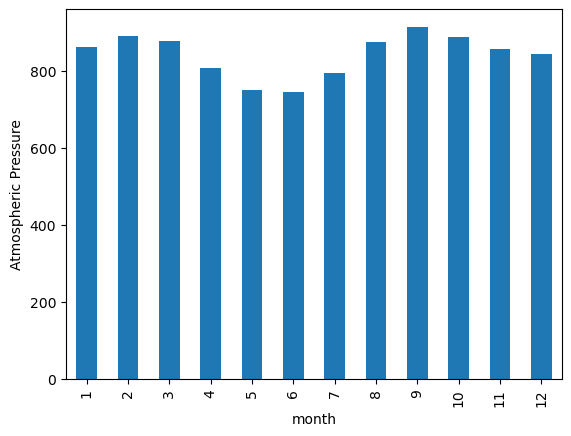

In [34]:
# Plot the average pressure by month
avg_pressure_chart = avg_pressure.plot.bar()

# Add label onto y-axis 
avg_pressure_chart.set_ylabel('Atmospheric Pressure')

## Month 6 has the lowest atmospheric pressure and month 9 has the highest atmospheric pressure.

<Axes: xlabel='Number of terrestrial days', ylabel='Minimum Temperature'>

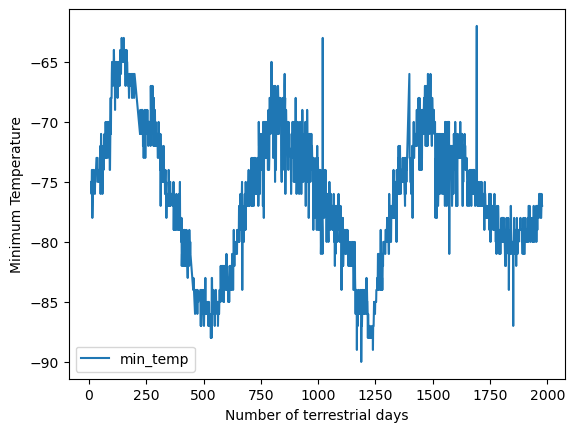

In [35]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sorted_sol = mars_df.sort_values('sol')

sorted_sol.plot(x='sol', y='min_temp', xlabel = 'Number of terrestrial days', ylabel = "Minimum Temperature")

## 1 year is defined as the time it takes for a planet to orbit the sun. 
## This chart shows the number of terrestrial days that have gone by graphed against the minimum temperature. 

## Based on the peaks and troughs, we can estimate that Mars orbits the sun 3 times in this chart, 
## and 3 Martian years have gone by. 
## Based on the troughs, it appears that a martian year is at least 625 terrestrial or Earth days ((750-500)/ 2 + 500).

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV
mars_df.to_csv('data.csv')

In [37]:
browser.quit()